In [1]:
import madina as md
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon

Wczytanie granicy

In [2]:
boundary_file=r"D:\Dysk\Studia\II_stopien\Praca magisterska\3.Madina_try\data\0264_GPKG\PL.PZGiK.337.BDOT10k.0264__OT_ADJA_A.gpkg"
boundary1=gpd.read_file(boundary_file)
boundary1

,TERYT,LOKALNYID,PRZESTRZENNAZW,WERSJA,POCZATEKWERSJIOBIEKTU,OZNACZENIEZMIANY,ZRODLODANYCHGEOMETRYCZNYCH,KATEGORIAISTNIENIA,UWAGI,INFORMACJADODATKOWA,KODKARTO10K,SKROTKARTOGRAFICZNY,NAZWA,IDENTYFIKATORPRG,IDENTYFIKATORTERYTJEDNOSTKI,IDTERYTJEDNOSTKINADRZEDNEJ,RODZAJ,geometry
0,0264,2881C5D6-33CF-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,PRG,None,None,None,0010_506,None,Wrocław-Stare Miasto,1002640590,0264059,0264,dzielnica lub delegatura,"POLYGON ((360348.76 364619.99, 360304.41 36463..."
1,0264,2881C5D6-33D0-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,PRG,None,None,None,0010_506,None,Wrocław-Śródmieście,1002640690,0264069,0264,dzielnica lub delegatura,"POLYGON ((364117.62 364461.35, 364054.48 36457..."
2,0264,2881C5D6-33D3-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,PRG,None,None,None,0010_501,None,Polska,10,10,None,państwo,"POLYGON ((346661.47 365878.54, 346655.84 36586..."
3,0264,2881C5D6-33D7-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,PRG,None,None,None,0010_506,None,Wrocław-Krzyki,1002640390,0264039,0264,dzielnica lub delegatura,"POLYGON ((356980.32 357603.18, 356977.58 35759..."
4,0264,2881C5D6-33D1-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,PRG,None,None,None,0010_506,None,Wrocław-Psie Pole,1002640490,0264049,0264,dzielnica lub delegatura,"POLYGON ((354593.41 372336.39, 354602.04 37230..."
5,0264,2881C5D6-33D2-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,PRG,None,None,None,0010_506,None,Wrocław-Fabryczna,1002640290,0264029,0264,dzielnica lub delegatura,"POLYGON ((346661.47 365878.54, 346655.84 36586..."
6,0264,2881C5D6-33D4-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,PRG,None,None,None,0010_504,None,m. Wrocław,100264,0264,02,powiat,"POLYGON ((346661.47 365878.54, 346655.84 36586..."
7,0264,2881C5D6-33D6-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,PRG,None,None,None,0010_505,None,M. Wrocław,1002640110,0264011,0264,gmina,"POLYGON ((346661.47 365878.54, 346655.84 36586..."
8,0264,2881C5D6-33D5-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,PRG,None,None,None,0010_503,None,dolnośląskie,1002,02,None,województwo,"POLYGON ((346661.47 365878.54, 346655.84 36586..."


In [3]:
#agregacja do powiatów:

# Agregacja granic do poziomu powiatu
boundary_powiat = boundary1.dissolve(by='IDENTYFIKATORTERYTJEDNOSTKI')

Wczytanie budynków i lista kolumn:

In [4]:
buildings_file=r"D:\Dysk\Studia\II_stopien\Praca magisterska\3.Madina_try\data\0264_GPKG\PL.PZGiK.337.BDOT10k.0264__OT_BUBD_A.gpkg"
buildings=gpd.read_file(buildings_file)
buildings.columns

Index(['TERYT', 'LOKALNYID', 'PRZESTRZENNAZW', 'WERSJA',
       'POCZATEKWERSJIOBIEKTU', 'OZNACZENIEZMIANY',
       'ZRODLODANYCHGEOMETRYCZNYCH', 'KATEGORIAISTNIENIA', 'UWAGI',
       'INFORMACJADODATKOWA', 'KODKARTO10K', 'SKROTKARTOGRAFICZNY', 'KODKST',
       'FUNKCJAOGOLNABUDYNKU', 'PRZEWAZAJACAFUNKCJABUDYNKU',
       'LICZBAKONDYGNACJI', 'NAZWA', 'FSBUD', 'IDEGIB', 'geometry'],
      dtype='object')

In [5]:
buildings_values = buildings['FUNKCJAOGOLNABUDYNKU'].unique()
buildings_values

array(['budynki mieszkalne',
       'budynki oświaty, nauki i kultury oraz budynki sportowe',
       'budynki biurowe', 'budynki handlowo-usługowe',
       'budynki przemysłowe', 'zbiorniki, silosy i budynki magazynowe',
       'budynki szpitali i inne budynki opieki zdrowotnej',
       'pozostałe budynki niemieszkalne',
       'budynki transportu i łączności',
       'budynki produkcyjne, usługowe i gospodarcze dla rolnictwa'],
      dtype=object)

In [6]:
building_selected_values = [ 'budynki handlowo-usługowe']
filtered_buildings = buildings[buildings['FUNKCJAOGOLNABUDYNKU'].isin(building_selected_values)]
filtered_buildings

,TERYT,LOKALNYID,PRZESTRZENNAZW,WERSJA,POCZATEKWERSJIOBIEKTU,OZNACZENIEZMIANY,ZRODLODANYCHGEOMETRYCZNYCH,KATEGORIAISTNIENIA,UWAGI,INFORMACJADODATKOWA,KODKARTO10K,SKROTKARTOGRAFICZNY,KODKST,FUNKCJAOGOLNABUDYNKU,PRZEWAZAJACAFUNKCJABUDYNKU,LICZBAKONDYGNACJI,NAZWA,FSBUD,IDEGIB,geometry
88,0264,9316B434-7351-48F9-95F1-2D630930FF06,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,None,0010_320_1,None,103,budynki handlowo-usługowe,obiekt handlowo-usługowy,1.0,None,obiekt handlowo-usługowy,PL.PZGiK.112.EGiB.05DB7481-09FD-4811-987D-5AD7...,"POLYGON ((360525.25 361432.14, 360527.26 36143..."
125,0264,BDA6F545-D52A-4A88-A581-42F820F19A61,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,None,0010_320_1,None,103,budynki handlowo-usługowe,obiekt handlowo-usługowy,2.0,None,obiekt handlowo-usługowy,PL.PZGiK.112.EGiB.CBA4C137-F2E6-46DC-BBDC-2A89...,"POLYGON ((359747.61 362467.58, 359753.77 36249..."
383,0264,2881C5D6-3875-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,Epi,0010_320_1,d. h.,103,budynki handlowo-usługowe,dom towarowy lub handlowy,1.0,None,dom towarowy lub handlowy,PL.PZGiK.112.EGiB.1646D1C5-3A3E-4BCF-BE10-AF48...,"POLYGON ((362001.77 360888.46, 362018.58 36092..."
408,0264,2881C5D6-3AF1-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,None,0010_320_1,d. h.,103,budynki handlowo-usługowe,dom towarowy lub handlowy,2.0,None,dom towarowy lub handlowy,PL.PZGiK.112.EGiB.AED0A735-3005-4B89-945E-6D26...,"POLYGON ((360819.06 363089.42, 360822.68 36309..."
674,0264,2881C5D6-581A-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,None,0010_320_1,d. h.,103,budynki handlowo-usługowe,dom towarowy lub handlowy,1.0,None,dom towarowy lub handlowy,PL.PZGiK.112.EGiB.C42255D2-BE3E-4ADE-8177-3941...,"POLYGON ((368632.14 367646.81, 368657.93 36768..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68078,0264,2881C5D6-3D13-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,None,0010_320_1,None,103,budynki handlowo-usługowe,stacja paliw,1.0,None,stacja paliw,PL.PZGiK.112.EGiB.0CD9D242-AE4D-4095-AAC0-61A5...,"POLYGON ((362787.58 360619.69, 362788.27 36062..."
68081,0264,2881C5D6-3895-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,Stacja paliw Orlen,0010_320_1,None,103,budynki handlowo-usługowe,stacja paliw,1.0,None,stacja paliw,PL.PZGiK.112.EGiB.2C9DFB77-D3E2-495C-BB8D-E289...,"POLYGON ((358502.64 364317.11, 358506.44 36432..."
68082,0264,f32872d6-8759-445b-94e9-c9deb2481e9e,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,ortofotomapa,eksploatowany,None,None,0010_320_1,None,103,budynki handlowo-usługowe,None,1.0,None,obiekt handlowo-usługowy|stacja paliw,None,"POLYGON ((356584.28 361924.28, 356589.38 36191..."
68091,0264,1D23EBA9-1051-45DC-894D-53EAEC99DA16,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,ortofotomapa,eksploatowany,None,None,0010_320_1,None,103,budynki handlowo-usługowe,stacja paliw,1.0,None,stacja paliw,None,"POLYGON ((354670.89 367652.64, 354670.3 367661..."


Utworzenie centroidów budynków

In [7]:
filtered_buildings["centroid"] = filtered_buildings.centroid
filtered_buildings["centroid"]
filtered_buildings

d:\Programy\conda\envs\madina_env\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,TERYT,LOKALNYID,PRZESTRZENNAZW,WERSJA,POCZATEKWERSJIOBIEKTU,OZNACZENIEZMIANY,ZRODLODANYCHGEOMETRYCZNYCH,KATEGORIAISTNIENIA,UWAGI,INFORMACJADODATKOWA,...,SKROTKARTOGRAFICZNY,KODKST,FUNKCJAOGOLNABUDYNKU,PRZEWAZAJACAFUNKCJABUDYNKU,LICZBAKONDYGNACJI,NAZWA,FSBUD,IDEGIB,geometry,centroid
88,0264,9316B434-7351-48F9-95F1-2D630930FF06,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,None,...,None,103,budynki handlowo-usługowe,obiekt handlowo-usługowy,1.0,None,obiekt handlowo-usługowy,PL.PZGiK.112.EGiB.05DB7481-09FD-4811-987D-5AD7...,"POLYGON ((360525.25 361432.14, 360527.26 36143...",POINT (360528.738 361458.124)
125,0264,BDA6F545-D52A-4A88-A581-42F820F19A61,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,None,...,None,103,budynki handlowo-usługowe,obiekt handlowo-usługowy,2.0,None,obiekt handlowo-usługowy,PL.PZGiK.112.EGiB.CBA4C137-F2E6-46DC-BBDC-2A89...,"POLYGON ((359747.61 362467.58, 359753.77 36249...",POINT (359760.057 362510.425)
383,0264,2881C5D6-3875-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,Epi,...,d. h.,103,budynki handlowo-usługowe,dom towarowy lub handlowy,1.0,None,dom towarowy lub handlowy,PL.PZGiK.112.EGiB.1646D1C5-3A3E-4BCF-BE10-AF48...,"POLYGON ((362001.77 360888.46, 362018.58 36092...",POINT (361992.114 360915.331)
408,0264,2881C5D6-3AF1-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,None,...,d. h.,103,budynki handlowo-usługowe,dom towarowy lub handlowy,2.0,None,dom towarowy lub handlowy,PL.PZGiK.112.EGiB.AED0A735-3005-4B89-945E-6D26...,"POLYGON ((360819.06 363089.42, 360822.68 36309...",POINT (360809.624 363109.501)
674,0264,2881C5D6-581A-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,None,...,d. h.,103,budynki handlowo-usługowe,dom towarowy lub handlowy,1.0,None,dom towarowy lub handlowy,PL.PZGiK.112.EGiB.C42255D2-BE3E-4ADE-8177-3941...,"POLYGON ((368632.14 367646.81, 368657.93 36768...",POINT (368633.141 367674.187)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68078,0264,2881C5D6-3D13-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,None,...,None,103,budynki handlowo-usługowe,stacja paliw,1.0,None,stacja paliw,PL.PZGiK.112.EGiB.0CD9D242-AE4D-4095-AAC0-61A5...,"POLYGON ((362787.58 360619.69, 362788.27 36062...",POINT (362783.486 360638.657)
68081,0264,2881C5D6-3895-CEB0-E053-CC2BA8C034D4,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,EGiB,eksploatowany,None,Stacja paliw Orlen,...,None,103,budynki handlowo-usługowe,stacja paliw,1.0,None,stacja paliw,PL.PZGiK.112.EGiB.2C9DFB77-D3E2-495C-BB8D-E289...,"POLYGON ((358502.64 364317.11, 358506.44 36432...",POINT (358501.535 364322.372)
68082,0264,f32872d6-8759-445b-94e9-c9deb2481e9e,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,ortofotomapa,eksploatowany,None,None,...,None,103,budynki handlowo-usługowe,None,1.0,None,obiekt handlowo-usługowy|stacja paliw,None,"POLYGON ((356584.28 361924.28, 356589.38 36191...",POINT (356589.272 361921.439)
68091,0264,1D23EBA9-1051-45DC-894D-53EAEC99DA16,PL.PZGiK.337.BDOT10k,2023-12-31 12:00:00,2023-12-31 12:00:00,GI-TOPO.600.116.2023,ortofotomapa,eksploatowany,None,None,...,None,103,budynki handlowo-usługowe,stacja paliw,1.0,None,stacja paliw,None,"POLYGON ((354670.89 367652.64, 354670.3 367661...",POINT (354656.997 367656.308)


Utworzenie  filtrowanych centroidów budynków - save do gpkg

d:\Programy\conda\envs\madina_env\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\marci\AppData\Local\Temp\ipykernel_2432\2579386719.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


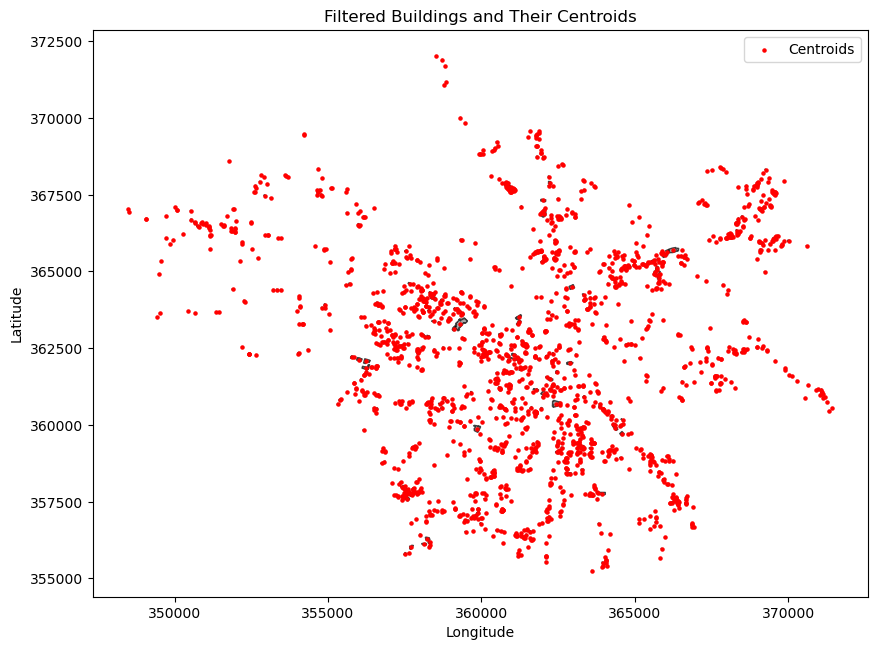

Centroidy zapisane do pliku centroid_buildings.gpkg


In [8]:
# Zakładam, że 'filtered_buildings' to istniejący GeoDataFrame
# Obliczanie centroidów
filtered_buildings['centroid'] = filtered_buildings.geometry.centroid

# Stworzenie nowego GeoDataFrame dla centroidów
centroid_buildings = gpd.GeoDataFrame(filtered_buildings[['centroid']], geometry='centroid', crs=filtered_buildings.crs)

# Wyświetlanie centroidów
fig, ax = plt.subplots(figsize=(10, 10))
filtered_buildings.plot(ax=ax, color='grey', edgecolor='black', alpha=0.7, label='Filtered Buildings')
centroid_buildings.plot(ax=ax, color='red', markersize=5, label='Centroids')
plt.legend()
plt.title('Filtered Buildings and Their Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Zapis do pliku GPKG
output_file = 'centroid_buildings.gpkg'
centroid_buildings.to_file(output_file, driver='GPKG')

# Informacja o zapisaniu
print(f'Centroidy zapisane do pliku {output_file}')

In [16]:
centroid_buildings

,centroid
88,POINT (360528.738 361458.124)
125,POINT (359760.057 362510.425)
383,POINT (361992.114 360915.331)
408,POINT (360809.624 363109.501)
674,POINT (368633.141 367674.187)
...,...
68078,POINT (362783.486 360638.657)
68081,POINT (358501.535 364322.372)
68082,POINT (356589.272 361921.439)
68091,POINT (354656.997 367656.308)


Utworzenie heksogenów - szer 1000m

In [14]:
# Oblicz granice całego obszaru
bounds = boundary_powiat.total_bounds  # minx, miny, maxx, maxy

# Funkcja do tworzenia heksagonu
def create_hexagon(center, size):
    angles = np.linspace(0, 2 * np.pi, 7)
    return Polygon([(center[0] + size * np.cos(a), center[1] + size * np.sin(a)) for a in angles])

# Tworzenie siatki heksagonalnej
hex_size = 1000  # rozmiar heksagonu w metrach
dx = hex_size * 3/2
dy = hex_size * np.sqrt(3)
grid_cells = []

x_start = bounds[0] - dx
x_end = bounds[2] + dx
y_start = bounds[1] - dy
y_end = bounds[3] + dy

x = x_start
while x < x_end:
    y = y_start if (x // dx) % 2 == 0 else y_start + dy / 2  # przesunięcie co drugi wiersz
    while y < y_end:
        center = (x, y)
        hexagon = create_hexagon(center, hex_size)
        grid_cells.append(hexagon)
        y += dy
    x += dx

hex_grid = gpd.GeoDataFrame({'geometry': grid_cells})
hex_grid = hex_grid[hex_grid.intersects(boundary_powiat.unary_union)]

# Zapisz siatkę heksagonalną do pliku GPKG
output_path = "hex_grid.gpkg"
hex_grid.to_file(output_path, layer='hexagons', driver="GPKG")

# Tworzenie centroidów dla każdego sześciokąta
centroids = hex_grid.centroid
centroid_gdf = gpd.GeoDataFrame(geometry=centroids, crs=filtered_buildings.crs)

# Zapisz centroidy do pliku GPKG
output_path = "hexagon_centroids.gpkg"
centroid_gdf.to_file(output_path, layer='centroids', driver="GPKG")



C:\Users\marci\AppData\Local\Temp\ipykernel_2432\2810554250.py:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  hex_grid = hex_grid[hex_grid.intersects(boundary_powiat.unary_union)]
d:\Programy\conda\envs\madina_env\Lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


Utworzenie centroidów siatki heksogenalnej

In [15]:
# Tworzenie centroidów dla każdego sześciokąta
centroids = hex_grid.centroid
centroid_gdf = gpd.GeoDataFrame(geometry=centroids, crs=filtered_buildings.crs)

# Zapisz centroidy do pliku GPKG
output_path = "hexagon_centroids.gpkg"
centroid_gdf.to_file(output_path, layer='centroids', driver="GPKG")

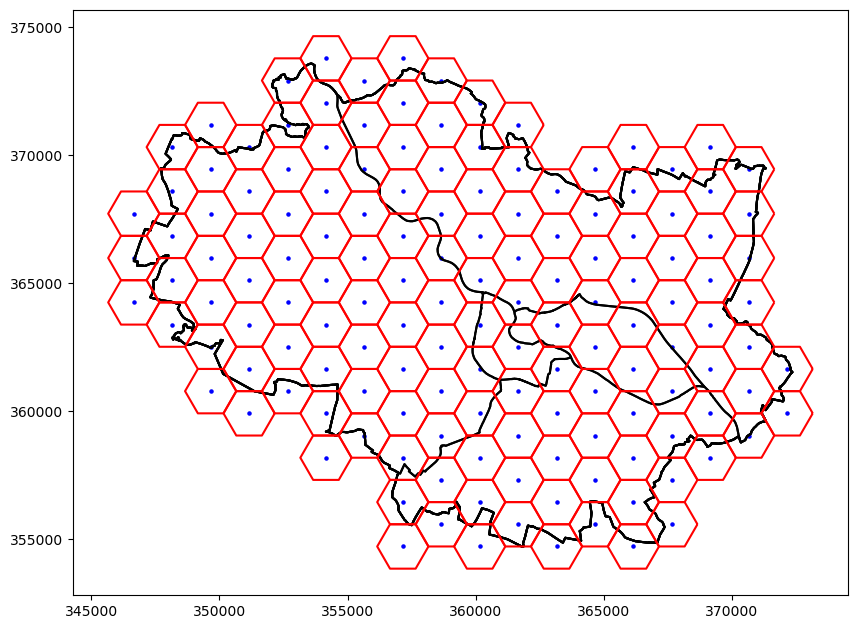

Centroidy zostały zapisane do pliku hexagon_centroids.gpkg


In [13]:
# Wyświetlanie siatki heksagonalnej i centroidów
fig, ax = plt.subplots(figsize=(10, 10))
boundary_powiat.boundary.plot(ax=ax, color='black')
hex_grid.boundary.plot(ax=ax, color='red')
centroid_gdf.plot(ax=ax, color='blue', markersize=5)
plt.show()

print(f"Centroidy zostały zapisane do pliku {output_path}")

Wnioski: dla centroidów budynków i siatki utworzyć pole id etc z unikalnym identyfikatorem
